# Get data

Load dataset 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import glob
import os


In [3]:
# Step 1: Get all txt file paths in the folder
file_paths = glob.glob("../OpalPatronage/Opal_Patronage_*.txt")

# Optional: Sort by date in filename
file_paths.sort()

# Step 2: Read all files into one DataFrame
df_list = []
for path in file_paths:
    print(f"Reading: {path}")
    df = pd.read_csv(path, sep='|')
    df_list.append(df)

# Step 3: Concatenate into one DataFrame
full_df = pd.concat(df_list, ignore_index=True)

# Step 4 (Optional): Convert <100 to NaN or estimate
def convert(x):
    try:
        return int(x)
    except:
        return 0  # or return 50

full_df['Tap_Ons'] = full_df['Tap_Ons'].apply(convert)
full_df['Tap_Offs'] = full_df['Tap_Offs'].apply(convert)

# Done: Preview
print(full_df.head())


Reading: ../OpalPatronage/Opal_Patronage_20200101.txt
Reading: ../OpalPatronage/Opal_Patronage_20200102.txt
Reading: ../OpalPatronage/Opal_Patronage_20200103.txt
Reading: ../OpalPatronage/Opal_Patronage_20200104.txt
Reading: ../OpalPatronage/Opal_Patronage_20200105.txt
Reading: ../OpalPatronage/Opal_Patronage_20200106.txt
Reading: ../OpalPatronage/Opal_Patronage_20200107.txt
Reading: ../OpalPatronage/Opal_Patronage_20200108.txt
Reading: ../OpalPatronage/Opal_Patronage_20200109.txt
Reading: ../OpalPatronage/Opal_Patronage_20200110.txt
Reading: ../OpalPatronage/Opal_Patronage_20200111.txt
Reading: ../OpalPatronage/Opal_Patronage_20200112.txt
Reading: ../OpalPatronage/Opal_Patronage_20200113.txt
Reading: ../OpalPatronage/Opal_Patronage_20200114.txt
Reading: ../OpalPatronage/Opal_Patronage_20200115.txt
Reading: ../OpalPatronage/Opal_Patronage_20200116.txt
Reading: ../OpalPatronage/Opal_Patronage_20200117.txt
Reading: ../OpalPatronage/Opal_Patronage_20200118.txt
Reading: ../OpalPatronage/Op

In [4]:
full_df.head(11)

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs
0,2020-01-01,Bus,Chatswood,0,0,0
1,2020-01-01,Bus,Macquarie Park,0,0,0
2,2020-01-01,Bus,Newcastle and surrounds,0,0,0
3,2020-01-01,Bus,North Sydney,0,700,100
4,2020-01-01,Bus,Other,0,4500,3200
5,2020-01-01,Bus,Parramatta,0,100,0
6,2020-01-01,Bus,Strathfield,0,0,0
7,2020-01-01,Bus,Sydney CBD,0,3200,200
8,2020-01-01,Bus,All - NSW,0,8500,3500
9,2020-01-01,Bus,Chatswood,1,200,200


In [5]:
full_df['mode_name'].unique()

array(['Bus', 'Ferry', 'Light rail', 'Train', 'UNKNOWN'], dtype=object)

In [6]:
# Drop rows where mode_name is 'UNKNOWN'
full_df = full_df[full_df['mode_name'] != 'UNKNOWN']

In [7]:
full_df['mode_name'].unique()

array(['Bus', 'Ferry', 'Light rail', 'Train'], dtype=object)

In [8]:
full_df['ti_region'].unique()

array(['Chatswood', 'Macquarie Park', 'Newcastle and surrounds',
       'North Sydney', 'Other', 'Parramatta', 'Strathfield', 'Sydney CBD',
       'All - NSW', 'Wollongong and surrounds'], dtype=object)

In [9]:
full_df.groupby(['mode_name', 'ti_region']).size()


mode_name   ti_region               
Bus         All - NSW                   48504
            Chatswood                   48439
            Macquarie Park              48440
            Newcastle and surrounds     40387
            North Sydney                48355
            Other                       48504
            Parramatta                  48502
            Strathfield                 48356
            Sydney CBD                  48504
            Wollongong and surrounds    37314
Ferry       All - NSW                   40873
            Newcastle and surrounds     36445
            North Sydney                35965
            Other                       40262
            Parramatta                  18598
            Sydney CBD                  40346
Light rail  All - NSW                   46255
            Newcastle and surrounds     40187
            North Sydney                   62
            Other                       45745
            Parramatta                   45

In [10]:
full_df['trip_origin_date'] = pd.to_datetime(full_df['trip_origin_date'])

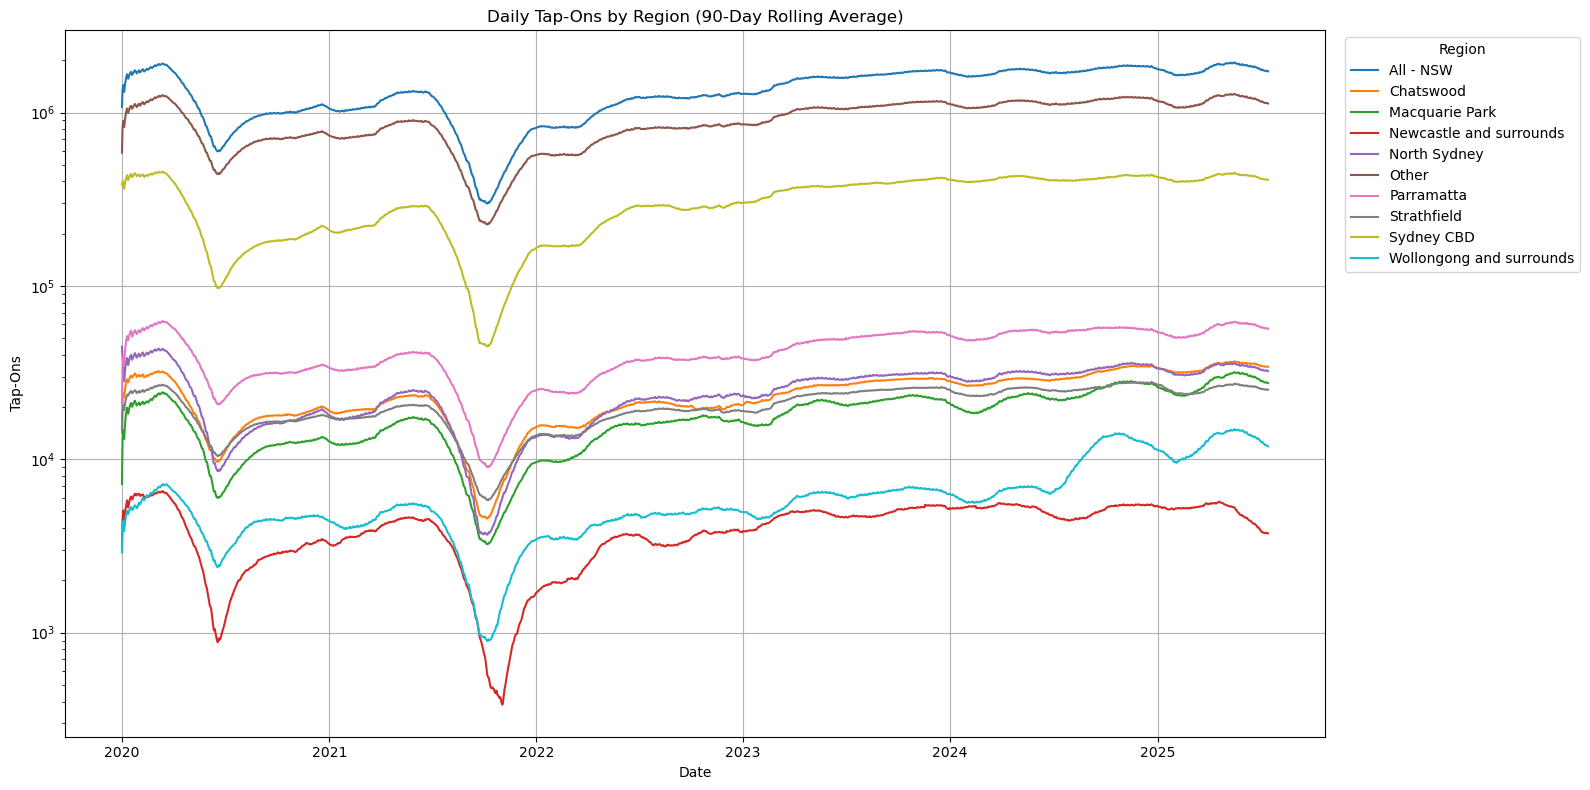

In [22]:
# Group by date and region, then sum
region_daily = full_df.groupby(['trip_origin_date', 'ti_region'])['Tap_Ons'].sum().unstack()

# Apply 7-day rolling average
region_daily_smoothed = region_daily.rolling(window='90D', min_periods=1).mean()

# Plot
plt.figure(figsize=(16,8))
for region in region_daily_smoothed.columns:
    plt.plot(region_daily_smoothed.index, region_daily_smoothed[region], label=region)

plt.title("Daily Tap-Ons by Region (90-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Tap-Ons")
plt.yscale("log")
plt.legend(title="Region", loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.grid(True)
plt.show()